In [1]:
import argparse
import json
import os
import pytorch_lightning as L
import numpy as np
import torch
import torchmetrics
import trainUtils
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from tqdm import tqdm
import pandas as pd

/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dfexp = pd.read_excel("./temp/1210_对应信息.xlsx", sheet_name="Sheet1")
# dfexp["new"] = dfexp["蛋白质序列.1"].map(df["new"])
dfexp2 = pd.read_excel("./temp/1210_对应信息.xlsx", sheet_name="Sheet2")
dfexp2["rank"] = range(len(dfexp2))
dfexp2["rank"] = -dfexp2["rank"]
dfexp["rank"] = dfexp["质粒的名称"].map(dfexp2.set_index("Name")["rank"])
dfexp = dfexp.sort_values("rank")
dfexp.head()

,质粒的名称,蛋白质序列,蛋白质序列.1,rank
6,VILH-306,GSMISQGNGGGCRPGEPCWRCALESTRCITLMGVLVALLAACMLSV...,MISQGNGGGCRPGEPCWRCALESTRCITLMGVLVALLAACMLSVPP...,-105
7,VILH-5,GSMDHRSYADAELAESWMHENLVQWIDRFRSVVAIYSNALFEVAGT...,MDHRSYADAELAESWMHENLVQWIDRFRSVVAIYSNALFEVAGTLS...,-104
9,VILH-48,GSMAQARPQGHISWLWKWATSATNTNTHKLATKAPLNLSSEYRLNF...,MAQARPQGHISWLWKWATSATNTNTHKLATKAPLNLSSEYRLNFAR...,-103
16,VILH-730,GSMSFSEPLTVVGVMLTLASGMMRHTSQEALCALAAASFLLLMLVL...,SFSEPLTVVGVMLTLASGMMRHTSQEALCALAAASFLLLMLVLGTR...,-102
0,VILH-301,GSMPPQRARGAPPRRRGSDPPDPGSLAGRLSPGGRSGGGSRRTLSR...,MPPQRARGAPPRRRGSDPPDPGSLAGRLSPGGRSGGGSRRTLSRSS...,-101


In [3]:
dfexp2

,Name,final_p
0,VILH-828,9.641027e-01
1,VILH-53,9.512501e-01
2,VILH-791,8.455487e-01
3,VILH-295,1.062373e-01
4,VILH-284,9.213277e-02
...,...,...
101,VILH-301,3.889164e-07
102,VILH-730,2.286082e-07
103,VILH-48,6.757831e-08
104,VILH-5,5.733598e-08


In [ ]:
dfexp = pd.read_excel("./temp/1210_对应信息.xlsx", sheet_name="Sheet1")
dfexp

In [99]:
path = "/data2/tyfei/trainresults/ionChannels/ESMC/moreaug" 
with open(os.path.join(path, "config.json"), "r") as f:
    configs = json.load(f)

In [100]:
pretrain_model = trainUtils.loadPretrainModel(configs)

model = trainUtils.buildModel(configs, pretrain_model, None)

In [103]:
t = torch.load("/data2/tyfei/trainresults/ionChannels/ESMC/moreaug/epoch=5-validate_acc=1.00.ckpt")
model.load_state_dict(t['state_dict'], strict=False)

_IncompatibleKeys(missing_keys=['pos_weights', 'esm_model.embed.weight', 'esm_model.transformer.blocks.0.attn.layernorm_qkv.0.weight', 'esm_model.transformer.blocks.0.attn.layernorm_qkv.0.bias', 'esm_model.transformer.blocks.0.attn.layernorm_qkv.1.linear.weight', 'esm_model.transformer.blocks.0.attn.out_proj.linear.weight', 'esm_model.transformer.blocks.0.attn.q_ln.weight', 'esm_model.transformer.blocks.0.attn.k_ln.weight', 'esm_model.transformer.blocks.0.ffn.0.weight', 'esm_model.transformer.blocks.0.ffn.0.bias', 'esm_model.transformer.blocks.0.ffn.1.linear.weight', 'esm_model.transformer.blocks.0.ffn.3.linear.weight', 'esm_model.transformer.blocks.1.attn.layernorm_qkv.0.weight', 'esm_model.transformer.blocks.1.attn.layernorm_qkv.0.bias', 'esm_model.transformer.blocks.1.attn.layernorm_qkv.1.linear.weight', 'esm_model.transformer.blocks.1.attn.out_proj.linear.weight', 'esm_model.transformer.blocks.1.attn.q_ln.weight', 'esm_model.transformer.blocks.1.attn.k_ln.weight', 'esm_model.transf

In [73]:
t

{'epoch': 11,
 'global_step': 17028,
 'pytorch-lightning_version': '2.3.3',
 'state_dict': OrderedDict([('additional_label_weights',
               tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
                       0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
                       0.1000, 0.1000], device='cuda:6')),
              ('pos_weights',
               tensor([  1.0000,   1.0000,   5.0000,   2.0000,   0.5000,   5.0000,  10.0000,
                        40.0000,   5.0000,  30.0000, 200.0000,   1.0000,   2.0000,   1.0000,
                        11.0000,   3.0000,   1.0000,   3.0000,   1.0000,   1.0000],
                      device='cuda:6')),
              ('esm_model.transformer.blocks.0.attn.layernorm_qkv.1.lora.A',
               tensor([[ 2.2088e-05, -1.3026e-01,  8.3683e-02,  7.8825e-06],
                       [ 1.2218e-05, -1.1752e-01, -4.0163e-05, -6.5943e-02],
                       [-1.4199e-05,  2.0798e-

In [84]:
ds = trainUtils.loadDataset(configs)
dl = ds.val_dataloader()

get val loader


In [ ]:
for i, j in enumerate(dl):
    print(j)
    break

In [85]:
from esm.models.esm3 import ESM3

model = ESM3.from_pretrained("esm3_sm_open_v1", torch.device("cpu"))

In [89]:
import VirusDataset
test = trainUtils.loadPickle("/data/tyfei/datasets/ion_channel/Interprot/test885.pkl")
test_set = VirusDataset.ESM3MultiTrackDatasetTEST(test) 
dl = DataLoader(test_set, batch_size=1, shuffle=False) 

In [90]:
device = torch.device("cuda:0") 
trunc = 4000
take_embed = "mean"
model_type = "esm3"
# model = model.esm_model
res = []
la = []
model = model.to(device)
model.eval()
pbar = tqdm(dl)
cnt = 0
with torch.no_grad():
    for i, j in enumerate(pbar):
        if isinstance(j, list):
            la.append(j[1][0][0].item())
            j = j[0]
        cnt += 1
        if cnt == trunc:
            break

        for track in ["seq_t", "structure_t", "ss8_t", "sasa_t"]:
            if track not in j:
                j[track] = None
            else:
                j[track] = j[track].to(device)
                if len(j[track].size()) == 1:
                    j[track] = j[track].unsqueeze(0)
        if model_type == "esm3":
            representations = model(
                sequence_tokens=j["seq_t"],
                structure_tokens=j["structure_t"],
                ss8_tokens=j["ss8_t"],
                sasa_tokens=j["sasa_t"],
            )
        elif model_type == "esmc":
            representations = model(
                sequence_tokens=j["seq_t"],
            )

        if take_embed == "first":
            representations = representations.embeddings[:, 0]
        else:
            representations = torch.mean(representations.embeddings, dim=1)
        res.append(representations.cpu().numpy())
        

  0%|          | 0/885 [00:00<?, ?it/s]

100%|██████████| 885/885 [01:05<00:00, 13.57it/s]


In [88]:
resemds = res 
reslabels = la

In [38]:
len(reslabels)

3950

In [91]:
resemds.extend(res)
reslabels.extend(la) 
# reslabels = la

In [92]:
reslabels.extend([2]*885)

In [93]:
q = np.array(resemds)
q = q.squeeze()
q.shape

(4835, 1536)

In [94]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=30) 
pca_seq = pca.fit_transform(q)
pca_seq.shape
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(pca_seq)

In [95]:
df = pd.DataFrame({"x":X_embedded[:, 0], "y":X_embedded[:, 1], "label":reslabels})
# df["class"] = df["label"].map({1:"Ion channel", 0:"non ion channel", 2:"Virus"})
df.head()

,x,y,label
0,21.071140,46.113438,1
1,66.219414,1.355554,1
2,76.929611,-10.970700,1
3,60.837669,-10.172388,1
4,24.098083,66.537041,1


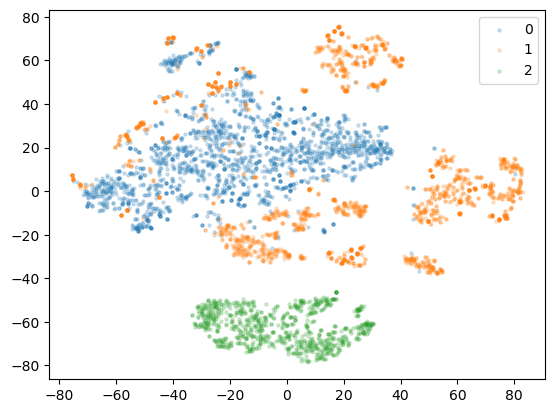

In [96]:
import matplotlib.pyplot as plt
for i in np.unique(df["label"]):
    subdf = df[df["label"] == i]
    plt.scatter(subdf["x"], subdf["y"], label=i, s=5, alpha=0.2)
plt.legend(bbox_to_anchor=(1,1))

In [10]:
len(j), isinstance(j, list)

(3, True)

In [67]:
dl = DataLoader(ds.val_set, batch_size=1, shuffle=False)

In [68]:
trainer = L.Trainer(devices=[7])
res = trainer.predict(model, dl)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/tyfei/anaconda3/envs/esm3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 3950/3950 [03:25<00:00, 19.19it/s]


In [69]:
acc = torchmetrics.Accuracy(task="binary")
t = 1
num = []
for t in range(21):
    y = [] 
    pre = [] 
    for i in res: 
        if t==0:
            pre.append(i[0][0])
            y.append(i[1][0][0])
        elif (i[1][0][t] > -0.5):
            pre.append(i[0][1][t-1])
            y.append(i[1][0][t])
    print(t)
    print(acc(torch.tensor(pre), torch.tensor(y)), torch.sum(torch.stack(y))/len(y))
    num.append((torch.sum(torch.stack(y))/len(y)).item())
num    

0
tensor(0.9957) tensor(0.4937)
1
tensor(0.8029) tensor(0.4487)
2
tensor(0.5585) tensor(0.5924)
3
tensor(0.8157) tensor(0.0816)
4
tensor(0.8912) tensor(0.2120)
5
tensor(0.8634) tensor(0.9014)
6
tensor(0.7721) tensor(0.0945)
7
tensor(0.7567) tensor(0.0493)
8
tensor(0.9867) tensor(0.0164)
9
tensor(0.7787) tensor(0.0714)
10
tensor(0.5395) tensor(0.0216)
11
tensor(0.9974) tensor(0.0021)
12
tensor(0.7767) tensor(0.4076)
13
tensor(0.8881) tensor(0.2290)
14
tensor(0.9084) tensor(0.2978)
15
tensor(0.8142) tensor(0.3503)
16
tensor(0.7939) tensor(0.1442)
17
tensor(0.8605) tensor(0.3019)
18
tensor(0.8485) tensor(0.1910)
19
tensor(0.7715) tensor(0.3863)
20
tensor(0.8980) tensor(0.7392)


[0.49367088079452515,
 0.4486652910709381,
 0.592402458190918,
 0.0816221758723259,
 0.21201232075691223,
 0.9014373421669006,
 0.09445585310459137,
 0.04928131401538849,
 0.01642710529267788,
 0.07135523855686188,
 0.02156057581305504,
 0.002053388161584735,
 0.40760019421577454,
 0.22904737293720245,
 0.29776158928871155,
 0.3503383696079254,
 0.14419573545455933,
 0.3019260764122009,
 0.1910463273525238,
 0.3862571716308594,
 0.7391983270645142]

In [86]:
0.5/np.array(num)

array([  0.97008542,   1.14705881,   0.87053568,   6.8023253 ,
         2.16666666,   0.55188679,   5.31818171,  10.08620674,
        41.78571352,   7.13414601,  32.49999997, 292.49999751,
         1.25550664,   2.11111106,   1.69642863,   1.36363633,
         3.65384625,   1.69642863,   2.74038468,   1.32558142,
         0.67216981])

tensor(0.5915)

In [10]:
import pickle
with open("/data/tyfei/datasets/ion_channel/Interpro_v2/kingdom/Eukaryota1_label.pkl_v2_1125.pkl", "rb") as f:
    bacteria = pickle.load(f)
bac = bacteria[0]
bac

{'randomseed': 1509,
 'model': 'esm3_sm_open_v1',
 'id': 'A0A151XG23',
 'ori_seq': 'MTISYASEVPNGSSFGCFWRILIKWRGSVYKLIWRELLAYLFFYYLINFTYRYVLNEHQRQIFEKIRYYFGNSSESIPMSFVLGFYVSLVVKRWWEQYKLLPWPDNLALFISAAIPGNDERGRLMRRNIVRYAVLAYVITLQRISLRVKRRFPTLQHMVDVGLMMESEKKIFEMMNKKAAMSKYWMPLVWATNIINRARKEALITSDHVVQTLLVELSDIRKRLGALIGYDTVCVPLVYTQVVTLSLYAYFFSALLGRQFVEHSNGTGKYEEPDMYFPFFTALQFCFYIGWLKVAEVLINPFGEDDDDIELNWLIDRHIKAGYMIVDEMHEEHPELLKDQYWDEVVPKDLPYTVASEHGQHRKSHQDDVYADYESVDTPLVERKKNGWFQRQITRVGSVRSSSTTYSSGGGFFTRNRHNSVYSSPETGGLPQTNNPNLKMSLYDRLVGRKSVRSQRMGRQGTMTKLNSVPVSLKNRPRIPTPDVTKEVIDREQRLALSAANAANIGAGVVGVIPANGHYPTDLSVVVLSPIQETESSPASGKSGAAALAQAVLSPTLTSAGLMTPVTLTPVTMGHLTQLGLMTTATTTTPHLNNQSNSVQATLTEVTSSEEEGSGSGSSRSGSITGQEDRSTPLIDNNNSPMGSNGSSPIFDGYNDRSPILMRPEKLGYVVTAAVPGIQTNRAMAIDARGRRSASLPGPPVSPAQLSNDRSMSLPQSPGLQSREIRIASVSSRQDGLAIDRLITGSHNQGIRSRTNSFGHDLSRSNQRGQDASRKISTVSCTNASLSSSTTSPTSSTSISTTTVTSSKRGEVYV',
 'seq_t': array([ 0, 20, 11, 12,  8, 19,  5,  8,  9,  7, 14, 17,  6,  8,  8, 18,  6,
        23, 18

In [16]:
bac["seq_t"][33:55], bac["seq_t"][68:90]

(array([12, 22, 10,  9,  4,  4,  5, 19,  4, 18, 18, 19, 19,  4, 12, 17, 18,
        11, 19, 10, 19,  7]),
 array([19, 19, 18,  6, 17,  8,  8,  9,  8, 12, 14, 20,  8, 18,  7,  4,  6,
        18, 19,  7,  8,  4]))

In [20]:
len(baseds._augmentsample(bac, (-1, -1), 100)["seq_t"])

102

In [7]:
dl = ds.train_dataloader() 
for i, d in enumerate(dl):
    print(d) 
    if i>10:
        break

get train loader
called new epoch
[{'seq_t': tensor([[ 0,  9,  9, 13, 11,  9,  8, 13,  4,  4,  5,  7, 17, 12, 12, 17, 10,  8,
          6, 12,  4,  6,  8,  4,  4, 14,  4,  9, 18, 21, 14, 11,  4, 10,  9, 11,
         10,  7, 14, 10, 14,  5,  8, 16,  7,  5, 15, 10,  5, 16, 16,  6,  2]])}, tensor([[ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1]]), {'seq_t': tensor([[ 0, 20, 20, 15, 19, 15,  4,  4,  8, 15, 16, 15,  6, 18, 12,  8,  4,  6,
          5, 12, 15,  8, 18, 18, 16, 18,  8, 17, 12,  8,  7, 19,  4, 12, 12,  6,
         11, 12,  5,  4, 19,  6, 22, 19, 10, 12, 17,  8,  4,  9,  8,  9, 17, 16,
          9,  4, 16,  8, 15, 17,  5, 13,  4, 17,  7,  9,  7,  9,  9, 11, 15, 15,
          9, 19, 17, 13,  4,  7, 13, 13, 12, 17,  9, 18, 10, 15, 16, 12, 17, 16,
         13, 12, 15, 15, 16, 16, 17, 12, 11, 15,  9,  4, 10,  9, 11, 10, 12, 15,
         17, 16, 15,  9, 12,  8, 15,  4, 10, 16, 12, 18, 17, 16,  8,  8,  8,  6,
          9, 16, 10, 13, 18,  

In [6]:
d[0]["seq_t"].shape

torch.Size([1, 120])

In [7]:
model.forward(d[0])

tensor([[ 0, 20,  5, 10, 18,  7,  5,  4,  7,  4,  4,  6,  4,  4,  8,  4,  8,  9,
          4, 13,  5, 12, 16, 10, 10, 14, 15, 12, 16,  7, 19,  8, 10, 21, 14, 14,
          9, 13,  6, 15, 14, 17, 19,  4, 17, 23, 19,  7,  8,  6, 18, 21, 14, 14,
         16, 12,  9, 12, 13,  4,  4, 15, 17,  6,  9, 15, 12, 15,  8,  9, 16,  8,
         13,  4,  8, 18,  8, 15, 13, 22,  8, 18, 19,  4,  4,  8, 21,  5,  9, 18,
         11, 14, 17,  8, 15, 13, 16, 19,  8, 23, 10,  7, 15, 21,  7, 11,  4,  9,
         16, 14, 16, 12,  7, 15, 22, 13, 10, 13,  4,  2]]) torch.Size([1, 120])


RuntimeError: mat1 and mat2 must have the same dtype, but got Float and BFloat16

In [10]:
from esm.models.esmc import ESMC
from esm.sdk.api import ESMProtein, LogitsConfig

In [11]:
protein = ESMProtein(sequence="AAAAA")
client = ESMC.from_pretrained("esmc_300m").to("cuda") # or "cpu"
protein_tensor = client.encode(protein)
logits_output = client.logits(
   protein_tensor, LogitsConfig(sequence=True, return_embeddings=True)
)
print(logits_output.logits, logits_output.embeddings)

ForwardTrackData(sequence=tensor([[[-38.0000, -38.0000, -38.0000,  12.6250,  21.6250,  22.2500,  22.0000,
           21.7500,  21.3750,  21.6250,  21.6250,  21.2500,  20.7500,  21.3750,
           21.8750,  20.8750,  20.7500,  20.2500,  20.3750,  20.1250,  21.7500,
           19.8750,  19.7500,  19.2500,  18.2500,   1.2656,  -1.6719,  -3.9688,
          -20.6250, -38.2500, -38.0000, -38.0000, -38.0000, -38.2500, -38.0000,
          -38.0000, -38.2500, -38.0000, -38.2500, -38.0000, -38.0000, -38.2500,
          -38.0000, -38.0000, -38.0000, -38.2500, -38.2500, -38.0000, -38.2500,
          -38.0000, -38.2500, -38.0000, -38.0000, -38.2500, -38.2500, -38.0000,
          -38.0000, -38.0000, -38.0000, -38.0000, -38.2500, -38.0000, -38.0000,
          -38.0000],
         [-40.2500, -40.0000, -40.2500,   5.3438,  20.1250,  19.8750,  18.7500,
           20.6250,  18.7500,  18.3750,  18.6250,  18.5000,  18.2500,  18.0000,
           18.7500,  17.7500,  17.3750,  17.1250,  17.7500,  16.8750,  22

In [13]:
client(sequence_tokens=d[0]["seq_t"].cuda())

ESMCOutput(sequence_logits=tensor([[[-36.2500, -36.2500, -36.2500,  ..., -36.2500, -36.2500, -36.2500],
         [-36.5000, -36.5000, -36.5000,  ..., -36.5000, -36.5000, -36.5000],
         [-32.7500, -32.7500, -32.7500,  ..., -32.7500, -32.7500, -32.7500],
         ...,
         [-34.7500, -34.5000, -34.5000,  ..., -34.5000, -34.5000, -34.5000],
         [-30.0000, -30.0000, -30.0000,  ..., -30.0000, -30.0000, -29.8750],
         [-31.0000, -31.0000, -31.0000,  ..., -31.0000, -31.0000, -31.0000]]],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<ViewBackward0>), embeddings=tensor([[[ 0.0026,  0.0060,  0.0051,  ...,  0.0038, -0.0041, -0.0036],
         [-0.0266,  0.0315,  0.0239,  ..., -0.0066, -0.0077, -0.0089],
         [-0.0270,  0.0322, -0.0048,  ..., -0.0430, -0.0479,  0.0398],
         ...,
         [-0.0444,  0.0344,  0.0262,  ...,  0.0153, -0.0640,  0.0262],
         [-0.0535,  0.0649, -0.0220,  ..., -0.0165, -0.0659,  0.0044],
         [-0.0203,  0.0305,  0.0304,  ..., 

In [ ]:
from esm.utils.sampling import _BatchedESMProteinTensor

In [7]:
client.forward(sequence_tokens = protein_tensor.sequence.unsqueeze(0))

ESMCOutput(sequence_logits=tensor([[[-38.0000, -38.0000, -38.0000,  12.6250,  21.6250,  22.2500,  22.0000,
           21.7500,  21.3750,  21.6250,  21.6250,  21.2500,  20.7500,  21.3750,
           21.8750,  20.8750,  20.7500,  20.2500,  20.3750,  20.1250,  21.7500,
           19.8750,  19.7500,  19.2500,  18.2500,   1.2656,  -1.6719,  -3.9688,
          -20.6250, -38.2500, -38.0000, -38.0000, -38.0000, -38.2500, -38.0000,
          -38.0000, -38.2500, -38.0000, -38.2500, -38.0000, -38.0000, -38.2500,
          -38.0000, -38.0000, -38.0000, -38.2500, -38.2500, -38.0000, -38.2500,
          -38.0000, -38.2500, -38.0000, -38.0000, -38.2500, -38.2500, -38.0000,
          -38.0000, -38.0000, -38.0000, -38.0000, -38.2500, -38.0000, -38.0000,
          -38.0000],
         [-40.2500, -40.0000, -40.2500,   5.3438,  20.1250,  19.8750,  18.7500,
           20.6250,  18.7500,  18.3750,  18.6250,  18.5000,  18.2500,  18.0000,
           18.7500,  17.7500,  17.3750,  17.1250,  17.7500,  16.8750,  2